## SUPPORT VECTOR MACHINE
### Dataset Selection:
Data set Description described in another document “Drug Response Classification”
### Task 1: Exploratory Data Analysis (EDA)
1.	Load the dataset and perform fundamental data exploration.
2.	Utilize histograms, box plots, or density plots to understand feature distributions.
3.	Investigate feature correlations to discern relationships within the data.
### Task 2: Data Preprocessing
1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.
### Task 3: Data Visualization
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2.	Visualize class distributions to gauge dataset balance or imbalance.
### Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
### Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.
### Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.
### Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2.	Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.
3.	Discuss practical implications of SVM in real-world classification tasks.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Task 1: Exploratory Data Analysis (EDA)
data = pd.read_csv('Pharma_Industry.csv')
data.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [4]:
data.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [5]:
data.isnull().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

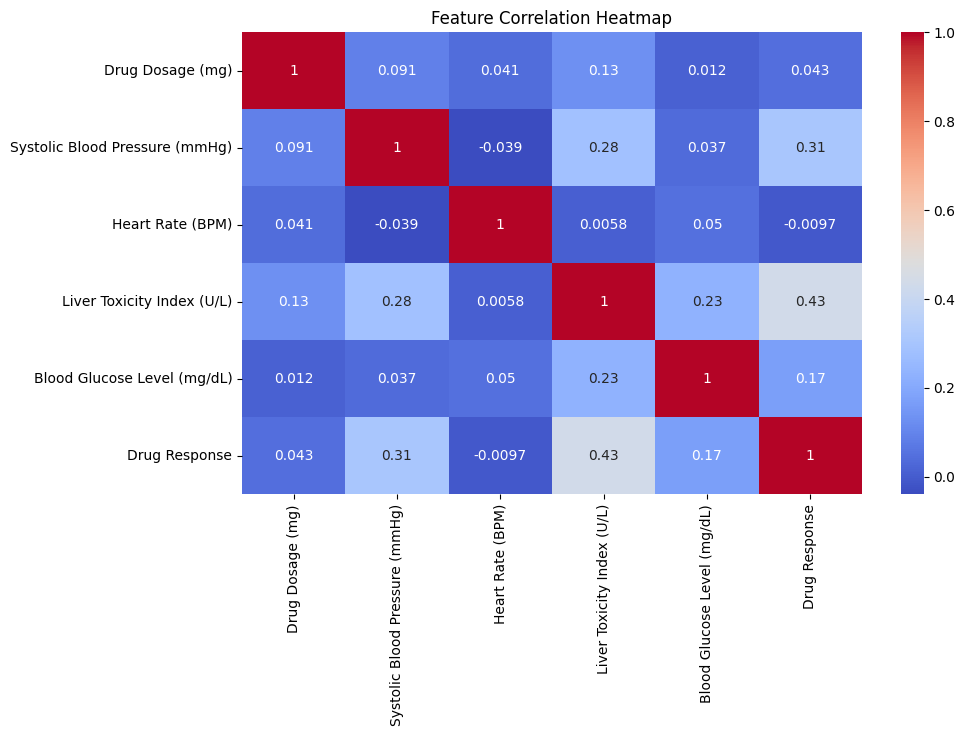

In [7]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [49]:
# Task 2: Data Preprocessing
data.info()
# we dont need to do any encoding as all data are in numerical format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [8]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Replace 'TargetColumn' with the actual target column name
X = data.drop('Drug Response', axis=1)
y = data['Drug Response']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


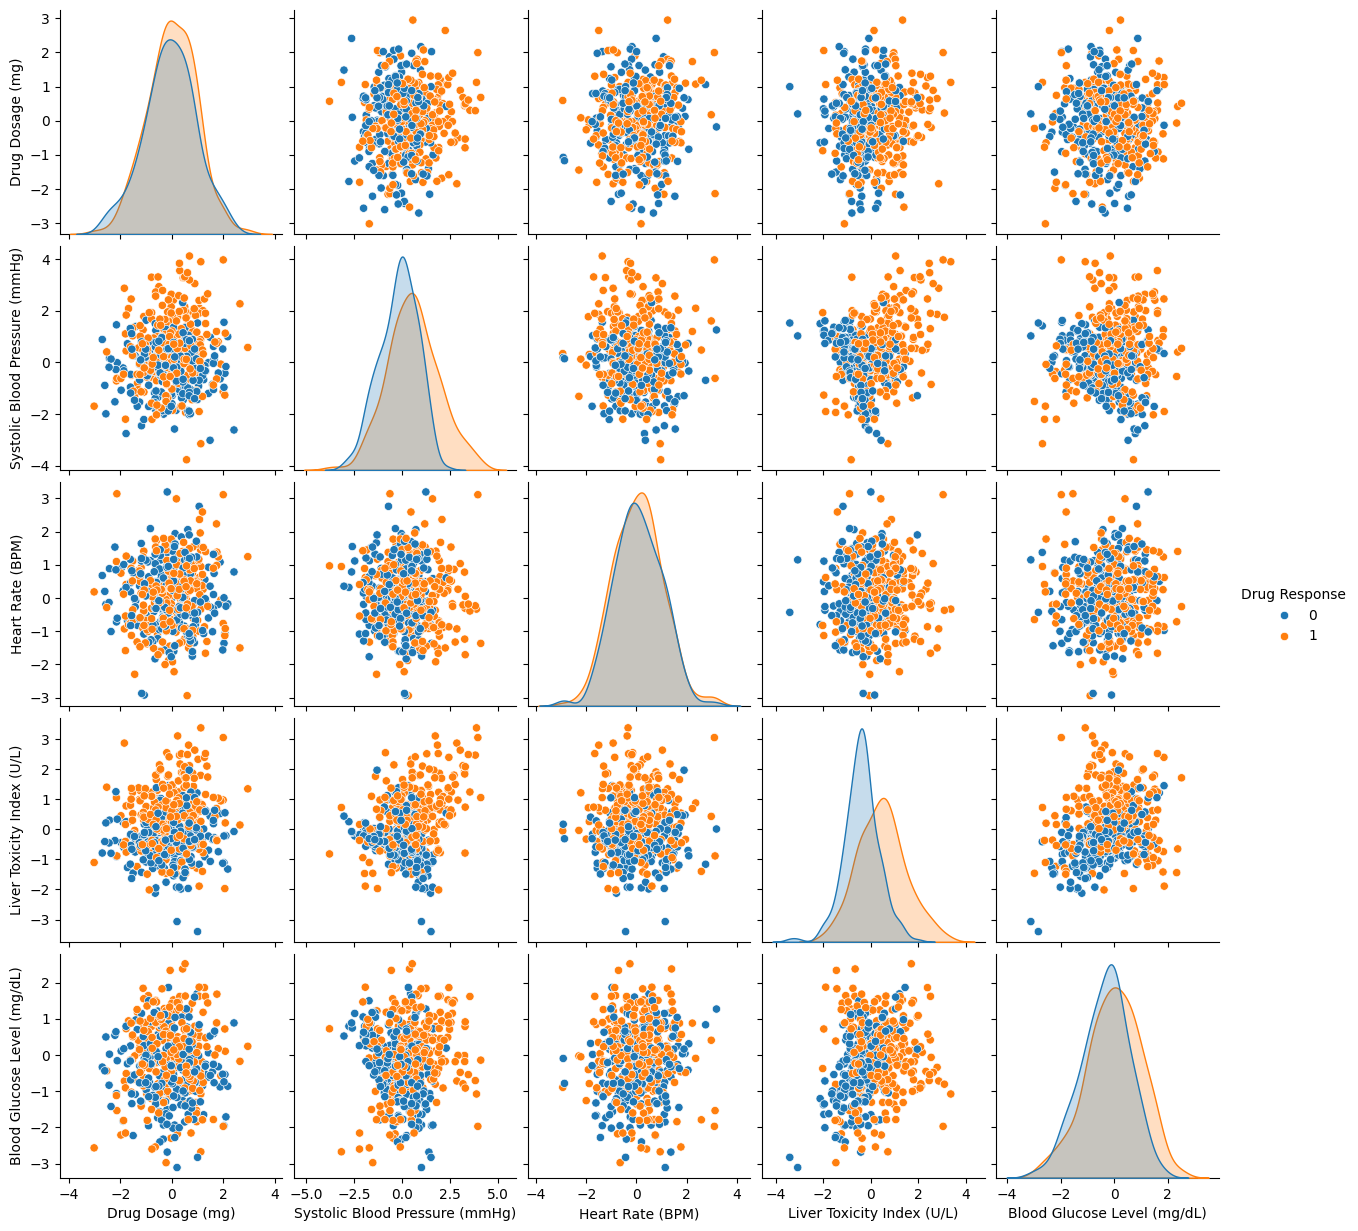

In [15]:
# Task 3: Data Visualization
# Pair plot (update 'Drug Response')
sns.pairplot(data, hue='Drug Response',)
plt.show()

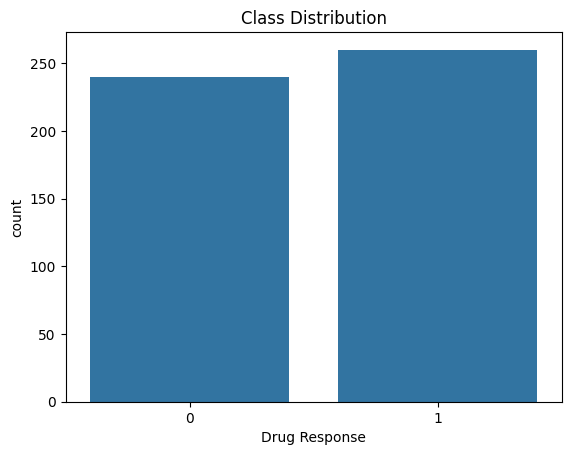

In [16]:
# Class distribution
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()

Accuracy: 0.78
Precision: 0.7872
Recall: 0.78
F1 Score: 0.780794861501405


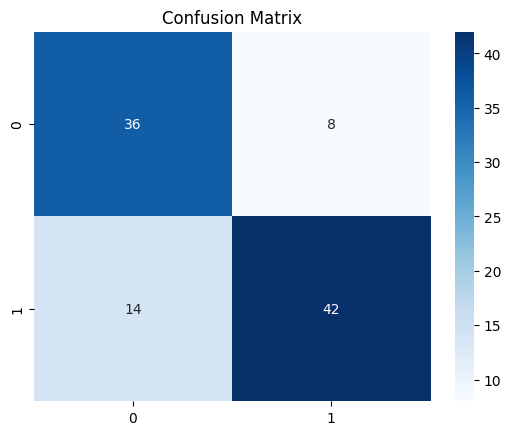

In [17]:
# Task 4: SVM Implementation
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Linear SVM
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


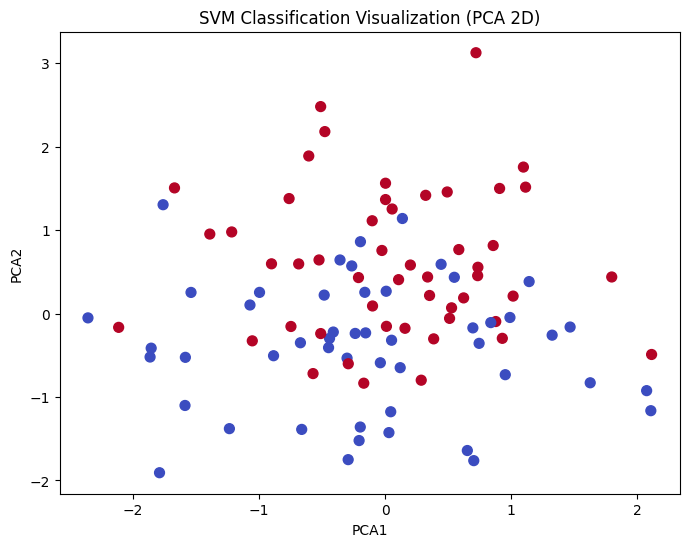

In [22]:
# Task 5: Visualization of SVM Results
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap='coolwarm', s=50)
plt.title('SVM Classification Visualization (PCA 2D)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


In [23]:
# Task 6: Parameter Tuning and Optimization

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(svm.SVC(), param_grid, refit=True, cv=5, verbose=2)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scal

Kernel: linear, Accuracy: 0.7800
Kernel: poly, Accuracy: 0.7100
Kernel: rbf, Accuracy: 0.8400


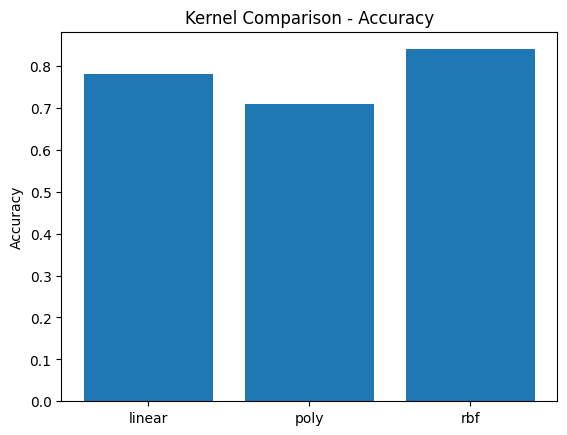

In [24]:
# Task 7: Comparison and Analysis

kernels = ['linear', 'poly', 'rbf']
results = {}

for k in kernels:
    model = svm.SVC(kernel=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[k] = acc
    print(f"Kernel: {k}, Accuracy: {acc:.4f}")

plt.bar(results.keys(), results.values())
plt.title('Kernel Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.show()


2.	Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.

    Strengths:
    - Works well in high-dimensional and small-sample datasets.
    - Handles linear and non-linear data using different kernels.

    Weaknesses:
    - Sensitive to scaling and hyperparameter tuning.
    - Computationally expensive on large datasets.
    - Doesn’t provide direct probability estimates.

3.	Discuss practical implications of SVM in real-world classification tasks.
    - Supports risk classification in healthcare decisions.
    - Broad use in domains like text, image, Handwriting Recognition and fraud detection.